## Predict Grocery Store. 2015 Model.
### ALMOST WORKING. 
y_test_std ≈ prediction , but need to scale back to normal value. Standard Scale. 
<br>REFERENCE: 21.01.Stu_Respiratory_Disease

In [2]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
read_df = pd.read_csv('Clean_Data/ML_2015_CLEAN.csv', encoding='utf-8')

In [4]:
# read_df.columns

In [5]:
# Check data types
print(read_df.dtypes)
read_df.head()

GeoID            int64
Year             int64
D_Etab           int64
D_Emp            int64
D_Pay            int64
G_Etab           int64
G_Emp            int64
G_Pay            int64
Pop_2015         int64
FD_num_2015      int64
FD_pct_2015    float64
dtype: object


,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2015,FD_num_2015,FD_pct_2015
0,1001,2015,11,93,1703,5,283,5691,55035,17497,32.06
1,1003,2015,50,429,7054,30,1774,36515,203690,30561,16.77
2,1005,2015,8,60,844,4,159,2733,26270,6070,22.11
3,1007,2015,5,40,596,5,111,2497,22561,969,4.23
4,1015,2015,34,263,4461,29,832,15066,115285,27786,23.43


In [ ]:
# read_df.describe()

In [ ]:
# read_df.corr()

### Plots to see value distribution and correlations

In [ ]:
# Plot Dollar Store and Population
read_df.plot(x='D_Etab', y='Pop_2015', style='o')  
plt.title('Dollar Store & County Population')  
plt.xlabel('Dollar Stores')  
plt.ylabel('County Pop')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Very strong correlation

In [ ]:
# Plot correlation between Dollar Stores & Pop with Low Access to food
read_df.plot(x='D_Etab', y='FD_num_2015', style='o')  
plt.title('Dollar Store & Low Food Access Population')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Strong correlation

In [ ]:
## Plot Dollar Stores & Percent of Pop w Low Access

read_df.plot(x='D_Etab', y='FD_pct_2015', style='o')  
plt.title('Dollar Store & Low Food Access Percentage')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Low Access Food Pop Percent')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

## Strange if not little correlation

In [ ]:
# Plot Grocery Stores &  Pop with Low Access to food
read_df.plot(x='G_Etab', y='FD_num_2015', style='o')  
plt.title('Grocery Store & Low Food Access Population')  
plt.xlabel('Grocery Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Why is this not a negative correlation?

In [27]:
read_df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay',
       'Pop_2015', 'FD_num_2015', 'FD_pct_2015'],
      dtype='object')

### Predict: Grocery Store Numbers
#### Train model & Set Target


In [8]:
# Select columns for machine learning processing
mldf = read_df[['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay',
       'Pop_2015', 'FD_num_2015']]
# mldf = read_df.iloc[:, 2:] # Use all columns
mldf.head()

,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2015,FD_num_2015
0,11,93,1703,5,283,5691,55035,17497
1,50,429,7054,30,1774,36515,203690,30561
2,8,60,844,4,159,2733,26270,6070
3,5,40,596,5,111,2497,22561,969
4,34,263,4461,29,832,15066,115285,27786


In [9]:
# REFERENCE: 21.01.Stu_Respiratory_Disease
# Assign X (data) & y (target)
# X = mldf[['D_Etab', 'Pop_2015', 'FD_num_2015']]
X = mldf.drop("G_Etab", axis=1) # drop target feature column
y = mldf["G_Etab"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1503, 7) (1503, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler= StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

/Users/bic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Users/bic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/bic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# Create Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
predictions = model.predict(X_test_std)
model.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

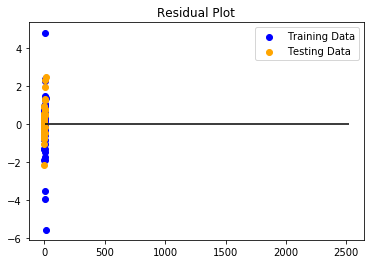

In [15]:
# Plot data selection
plt.scatter(model.predict(X_train_std), model.predict(X_train_std) - y_train_std, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_std), model.predict(X_test_std) - y_test_std, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_std, predictions)
r2 = model.score(X_test_std, y_test_std)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
# Good MSE = 0. Good R2 = 1.

MSE: 0.08778512210241918, R2: 0.7612472577513337


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 1.03825197 -0.63855802 -0.12965086  0.03300945  0.39427113  0.53277221
  -0.43528436]]
y-axis intercept:  [1.88621343e-17]


## HOW TO RESCALE BACK TO NORMAL VALUE?

In [19]:
predictions


array([[-2.93523826e-01],
       [-3.33776397e-01],
       [ 4.02226462e-01],
       [-2.33298287e-01],
       [-2.04731783e-01],
       [-3.18474861e-01],
       [-1.50229715e-01],
       [-2.02490241e-01],
       [ 1.72194354e+00],
       [-1.47289924e-02],
       [-2.35506561e-01],
       [-1.75793330e-01],
       [ 7.91531345e-02],
       [-2.69385880e-01],
       [-4.35535710e-01],
       [-4.52615827e-01],
       [-2.66044535e-01],
       [-2.10916574e-01],
       [-1.46752436e-01],
       [-3.31998487e-01],
       [-2.50763355e-01],
       [-2.57234219e-01],
       [-3.22758863e-01],
       [-9.16231422e-02],
       [-3.12932421e-01],
       [ 8.17066165e-02],
       [-3.79287875e-01],
       [-2.06114208e-01],
       [-6.62622617e-01],
       [-4.06105208e-01],
       [ 3.09914261e-02],
       [-2.94423390e-01],
       [-3.11793370e-01],
       [-1.66641209e-01],
       [-2.93069567e-01],
       [-2.55506773e-01],
       [-2.37699218e-01],
       [-1.25305519e-01],
       [-3.4

In [20]:
y_test_std

array([[-2.58156211e-01],
       [-2.37547101e-01],
       [ 3.03713189e-02],
       [-2.23807695e-01],
       [-2.23807695e-01],
       [-2.78765320e-01],
       [-1.82589477e-01],
       [-2.44416804e-01],
       [ 1.17074203e+00],
       [ 3.18898848e-01],
       [-2.23807695e-01],
       [-3.83257119e-02],
       [-7.95439304e-02],
       [-2.10068289e-01],
       [-2.65025914e-01],
       [-2.37547101e-01],
       [-2.58156211e-01],
       [-2.23807695e-01],
       [ 4.63162613e-01],
       [-2.65025914e-01],
       [-2.65025914e-01],
       [-2.78765320e-01],
       [-2.78765320e-01],
       [-5.89348212e-02],
       [-2.44416804e-01],
       [-1.89459180e-01],
       [-2.58156211e-01],
       [-2.58156211e-01],
       [-6.58045243e-02],
       [-1.13892446e-01],
       [-2.03198586e-01],
       [-2.71895617e-01],
       [-2.65025914e-01],
       [-2.44416804e-01],
       [-2.65025914e-01],
       [-1.68850070e-01],
       [-2.71895617e-01],
       [-1.13892446e-01],
       [-2.7

### Create Linear Regression loop with coefficients?
Apply to other years?